In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Preço do Ether

In [61]:
start = 1644451200 #Dia 10/02/2022
end = 1646870400 #Dia 10/03/2022

df_eth = pd.read_csv('export-EtherPrice.csv').query('UnixTimeStamp >= @start and UnixTimeStamp <= @end') #Base de dados disponível em Etherscan
df_eth['Date(UTC)'] = df_eth['Date(UTC)'].apply(lambda x: x[:-5])
df_eth

,Date(UTC),UnixTimeStamp,Value
2387,2/10,1644451200,3074.84
2388,2/11,1644537600,2928.93
2389,2/12,1644624000,2918.34
2390,2/13,1644710400,2872.44
2391,2/14,1644796800,2931.12
2392,2/15,1644883200,3185.81
2393,2/16,1644969600,3124.33
2394,2/17,1645056000,2894.42
2395,2/18,1645142400,2780.72
2396,2/19,1645228800,2764.50


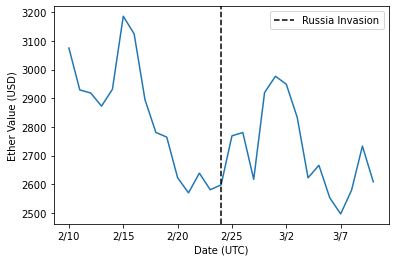

In [62]:
plt.plot(df_eth['Date(UTC)'], df_eth['Value'])
plt.xlabel('Date (UTC)')
plt.xticks([x for x in range(0,30,5)])
plt.ylabel('Ether Value (USD)')
plt.axvline(14, color = 'black', linestyle = '--', label = 'Russia Invasion')
plt.legend()
plt.gcf().savefig('ether_val.pdf')

### Transações Diárias

In [59]:
start = 1644451200 #Dia 10/02/2022
end = 1646870400 #Dia 10/03/2022

df_tx = pd.read_csv('export-TxGrowth.csv').query('UnixTimeStamp >= @start and UnixTimeStamp <= @end') #Base de dados disponível em Etherscan
df_tx['Date(UTC)'] = df_tx['Date(UTC)'].apply(lambda x: x[:-5])
df_tx

,Date(UTC),UnixTimeStamp,Value
2387,2/10,1644451200,1205676
2388,2/11,1644537600,1183966
2389,2/12,1644624000,1114648
2390,2/13,1644710400,1115296
2391,2/14,1644796800,1147522
2392,2/15,1644883200,1192633
2393,2/16,1644969600,1194693
2394,2/17,1645056000,1141997
2395,2/18,1645142400,1252754
2396,2/19,1645228800,1150162


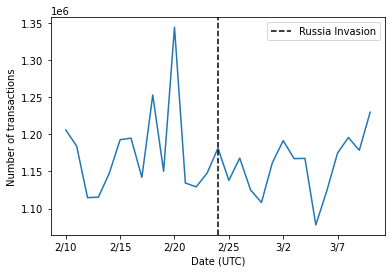

In [60]:
plt.plot(df_tx['Date(UTC)'], df_tx['Value'])
plt.xlabel('Date (UTC)')
plt.xticks([x for x in range(0,30,5)])
plt.ylabel('Number of transactions')
plt.axvline(14, color = 'black', linestyle = '--', label = 'Russia Invasion')
plt.legend()
plt.gcf().savefig('tx_num.pdf')

### Endereços diários

In [52]:
#TO DO: arrumar definição de endereços ativos e buscar endereços criados 1 mês antes
def active_addresses(df, day): #Retorna endereços ativos no dia enviado como parâmetro
    first_day = df['timestamp'].iloc[0]
    df_query = df.query('timestamp >= @first_day + (@day - 1) * 86400 and timestamp <= @first_day + @day * 86400')
    return len(df_query.groupby(['from']))

In [10]:
def accounts_of_week(df): #Chama active_addresses para todos os dias da semana
    accounts = {}
    for i in range(1,8):
        accounts[i] = active_addresses(df, i)
    return accounts

In [11]:
accounts_list = []
df_1 = pd.read_csv('fix_war_txs.csv')
df_1['timestamp'] = df_1['timestamp'].apply(int, base = 16)
accounts_list.append(accounts_of_week(df_1))
del df_1 #Deletando o dataframe da só pra garantir que a máquina não fique sem memória pra lidar com todos ao mesmo tempo

df_2 = pd.read_csv('fix_war_txs_2.csv')
df_2['timestamp'] = df_2['timestamp'].apply(int, base = 16)
accounts_list.append(accounts_of_week(df_2))
del df_2

df_3 = pd.read_csv('fix_war_txs_3.csv')
df_3['timestamp'] = df_3['timestamp'].apply(int, base = 16)
accounts_list.append(accounts_of_week(df_3))
del df_3

df_4 = pd.read_csv('fix_war_txs_4.csv')
df_4['timestamp'] = df_4['timestamp'].apply(int, base = 16)
accounts_list.append(accounts_of_week(df_4))
del df_4

In [53]:
#Converte o formato de lista do accounts list para um dicionário que cabe como dataframe
#Gambiarra, melhorar isso dps
accounts = {'day': [i for i in range(1,29)]}
df_1 = pd.read_csv('fix_war_txs.csv')
df_1['timestamp'] = df_1['timestamp'].apply(int, base = 16)
accounts['active_accounts'] = [active_addresses(df_1, i) for i in range(1,8)] #semana 1
del df_1

df_2 = pd.read_csv('fix_war_txs_2.csv')
df_2['timestamp'] = df_2['timestamp'].apply(int, base = 16)
accounts['active_accounts'].extend([active_addresses(df_2, i) for i in range(1,8)]) #semana 2
del df_2

df_3 = pd.read_csv('fix_war_txs_3.csv')
df_3['timestamp'] = df_3['timestamp'].apply(int, base = 16)
accounts['active_accounts'].extend([active_addresses(df_3, i) for i in range(1,8)]) #semana 3
del df_3

df_4 = pd.read_csv('fix_war_txs_4.csv')
df_4['timestamp'] = df_4['timestamp'].apply(int, base = 16)
accounts['active_accounts'].extend([active_addresses(df_4, i) for i in range(1,8)]) #semana 4
del df_4

accounts

{'day': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 'active_accounts': [411506,
  410560,
  400866,
  412712,
  409478,
  397575,
  373404,
  368989,
  336834,
  365655,
  379659,
  342126,
  352019,
  369001,
  380113,
  390551,
  420143,
  390817,
  370707,
  393114,
  415095,
  408198,
  400290,
  381553,
  400111,
  402161,
  463205,
  442377]}

In [54]:
acc_df = pd.DataFrame(accounts)
acc_df

,day,active_accounts
0,1,411506
1,2,410560
2,3,400866
3,4,412712
4,5,409478
5,6,397575
6,7,373404
7,8,368989
8,9,336834
9,10,365655


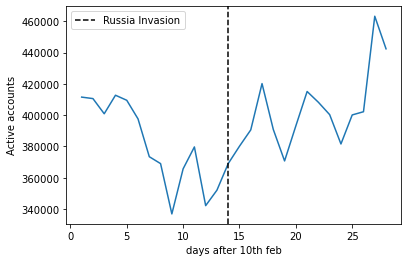

In [57]:
plt.plot(acc_df['day'], acc_df['active_accounts'])
plt.xlabel('days after 10th feb')
plt.ylabel('Active accounts')
plt.axvline(14, color = 'black', linestyle = '--', label = 'Russia Invasion')
plt.legend()
plt.gcf().savefig('accounts.pdf')

### Cálculo de degrees

In [46]:
def plot_outdegree(df, week, ax):
    df_count = df.groupby(['from']).size().reset_index(name = 'count') #Agrupa e conta ocorrências de endereços diferentes na coluna from
    df_count.sort_values(by = 'count')
    df_degrees = df_count.groupby(['count']).size().reset_index(name = 'count_num')
    s = sns.regplot(data = df_degrees, x = 'count', y = 'count_num', label = 'Semana '+str(week), fit_reg = False, ax = ax)
    s.set(xscale = 'log', yscale = 'log')
    s.set(xlabel = 'Out-degree', ylabel = 'Number of nodes')

def plot_indegree(df, week, ax):
    df_count = df.groupby(['to']).size().reset_index(name = 'count') #Agrupa e conta ocorrências de endereços diferentes na coluna to
    df_count.sort_values(by = 'count')
    df_degrees = df_count.groupby(['count']).size().reset_index(name = 'count_num')
    s = sns.regplot(data = df_degrees, x = 'count', y = 'count_num', label = 'Semana '+str(week), fit_reg = False, ax = ax)
    s.set(xscale = 'log', yscale = 'log')
    s.set(xlabel = 'In-degree', ylabel = 'Number of nodes')

def plot_degree(df, week, ax): #Agrupa e conta ocorrências de endereços diferentes na coluna from e to e soma as 2
    df_count_1 = df.groupby(['from']).size().reset_index(name = 'count') 
    df_count_2 = df.groupby(['to']).size().reset_index(name = 'count')
    
    df_degrees_1 = df_count_1.groupby(['count']).size().reset_index(name = 'count_num')
    df_degrees_2 = df_count_2.groupby(['count']).size().reset_index(name = 'count_num')
    df_degrees_total = pd.concat([df_degrees_1, df_degrees_2])
    df_degrees_total = df_degrees_total.groupby(['count']).sum().reset_index()
    s = sns.regplot(data = df_degrees_total, x = 'count', y = 'count_num', label = 'Semana '+str(week), fit_reg = False, ax = ax)
    s.set(xscale = 'log', yscale = 'log')
    s.set(xlabel = 'Degree', ylabel = 'Number of nodes')

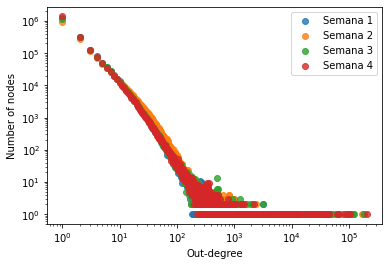

In [48]:
fig, ax = plt.subplots()

df_1 = pd.read_csv('fix_war_txs.csv')
df_1['timestamp'] = df_1['timestamp'].apply(int, base = 16)
plot_outdegree(df_1, 1, ax)
del df_1

df_2 = pd.read_csv('fix_war_txs_2.csv')
df_2['timestamp'] = df_2['timestamp'].apply(int, base = 16)
plot_outdegree(df_2, 2, ax)
del df_2

df_3 = pd.read_csv('fix_war_txs_3.csv')
df_3['timestamp'] = df_3['timestamp'].apply(int, base = 16)
plot_outdegree(df_3, 3, ax)
del df_3

df_4 = pd.read_csv('fix_war_txs_4.csv')
df_4['timestamp'] = df_4['timestamp'].apply(int, base = 16)
plot_outdegree(df_4, 4, ax)
del df_4

plt.legend()
fig.savefig('outdegree.pdf')

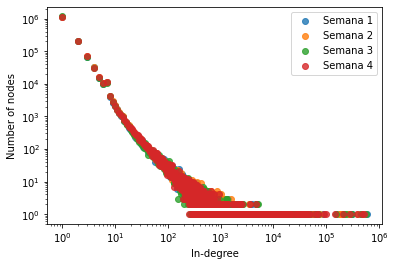

In [49]:
fig, ax = plt.subplots()

df_1 = pd.read_csv('fix_war_txs.csv')
plot_indegree(df_1, 1, ax)
del df_1

df_2 = pd.read_csv('fix_war_txs_2.csv')
plot_indegree(df_2, 2, ax)
del df_2

df_3 = pd.read_csv('fix_war_txs_3.csv')
plot_indegree(df_3, 3, ax)
del df_3

df_4 = pd.read_csv('fix_war_txs_4.csv')
plot_indegree(df_4, 4, ax)
del df_4

plt.legend()
fig.savefig('indegree.pdf')

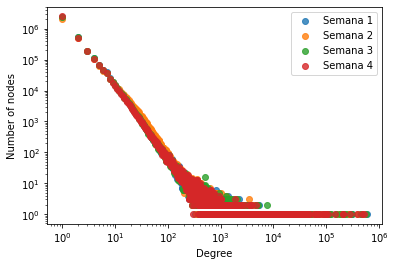

In [50]:
fig, ax = plt.subplots()

df_1 = pd.read_csv('fix_war_txs.csv')
plot_degree(df_1, 1, ax)
del df_1

df_2 = pd.read_csv('fix_war_txs_2.csv')
plot_degree(df_2, 2, ax)
del df_2

df_3 = pd.read_csv('fix_war_txs_3.csv')
plot_degree(df_3, 3, ax)
del df_3

df_4 = pd.read_csv('fix_war_txs_4.csv')
plot_degree(df_4, 4, ax)
del df_4

plt.legend()
fig.savefig('degree.pdf')

### Testes adicionais abaixo, ainda não são nada pronto

In [45]:
df_degrees_total.reset_index()

,count,count_num
0,1,2349697
1,2,526946
2,3,196329
3,4,111053
4,5,66392
...,...,...
1536,178902,1
1537,300834,1
1538,311166,1
1539,436831,1


In [40]:
df_degrees_1

,count,count_num
0,1,1198265
1,2,314659
2,3,128181
3,4,78744
4,5,51062
...,...,...
840,90172,1
841,105849,1
842,111883,1
843,118074,1


In [63]:
df_1 = pd.read_csv('fix_war_txs.csv')
df_count = df_1.groupby(['from']).size().reset_index(name = 'count')
df_count.sort_values(by = 'count')
del df_1 
df_2 = pd.read_csv('fix_war_txs_2.csv')
df_count_2 = df_2.groupby(['from']).size().reset_index(name = 'count')
df_count_2.sort_values(by = 'count')
df_comparasion = df_count.merge(df_count_2, on = 'from', suffixes = ('_1','_2'), how = 'inner')
df_comparasion['diff'] = df_comparasion['count_2'] - df_comparasion['count_1']
df_comparasion.sort_values(by = ['diff'])

,from,count
1973575,0xffffffffff2419497bf75e415bc9a7d446e05c0f,1
1015023,0x837b2cc7ffe78809099fef1964e43ed79784d779,1
1015022,0x837b26d7cea08f5d99198d60c22473b4064e8d8e,1
1015020,0x837b13a5625fb705715c46044b1beb0d4101681f,1
1015018,0x837b0506b903748c50905efcf2f0448c68e0421c,1
...,...,...
1813265,0xeb2629a2734e272bcc07bda959863f316f4bd4cf,90172
1711732,0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740,105849
1402751,0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511,111883
472755,0x3cd751e6b0078be393132286c442345e5dc49699,118074


In [80]:
df_2 = pd.read_csv('fix_war_txs_2.csv')
df_count = df_2.groupby(['from']).size().reset_index(name = 'count')
df_count.sort_values(by = 'count')
del df_2
df_3 = pd.read_csv('fix_war_txs_3.csv')
df_count_3 = df_3.groupby(['from']).size().reset_index(name = 'count')
df_count_3.sort_values(by = 'count')
df_comparasion = df_count.merge(df_count_3, on = 'from', suffixes = ('_2','_3'), how = 'inner')
df_comparasion['diff'] = df_comparasion['count_3'] - df_comparasion['count_2']
del df_3
df_comparasion.sort_values(by = ['diff'])

,from,count_2,count_3,diff
448888,0xd2c82f2e5fa236e114a81173e375a73664610998,27015,10868,-16147
315603,0x9430801ebaf509ad49202aabc5f5bc6fd8a3daf8,11093,3508,-7585
166163,0x4d9ff50ef4da947364bb9650892b2554e7be5e2b,8069,3313,-4756
431804,0xcac725bef4f114f728cbcfd744a731c2a463c3fc,5033,1323,-3710
309182,0x912fd21d7a69678227fe6d08c64222db41477ba0,12152,8950,-3202
...,...,...,...,...
387192,0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511,109913,114389,4476
87817,0x28c6c06298d514db089934071355e5743bf21d60,40302,44911,4609
403291,0xbd5cdd2b3d04ce42605aaea7e8355ac0e0a12710,3870,11761,7891
54778,0x1938a448d105d26c40a52a1bfe99b8ca7a745ad0,5831,17197,11366


In [82]:
df_3 = pd.read_csv('fix_war_txs_3.csv')
df_count = df_3.groupby(['from']).size().reset_index(name = 'count')
df_count.sort_values(by = 'count')
del df_3
df_4 = pd.read_csv('fix_war_txs_4.csv')
df_count_4 = df_4.groupby(['from']).size().reset_index(name = 'count')
df_count_4.sort_values(by = 'count')
df_comparasion = df_count.merge(df_count_4, on = 'from', suffixes = ('_3','_4'), how = 'inner')
df_comparasion['diff'] = df_comparasion['count_4'] - df_comparasion['count_3']
del df_4
df_comparasion.sort_values(by = ['diff'])

,from,count_3,count_4,diff
457867,0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740,105947,90142,-15805
126547,0x3cd751e6b0078be393132286c442345e5dc49699,120833,105900,-14933
374965,0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511,114389,100189,-14200
484914,0xeb2629a2734e272bcc07bda959863f316f4bd4cf,91400,80330,-11070
461584,0xdfd5293d8e347dfe59e90efd55b2956a1343963d,42140,36501,-5639
...,...,...,...,...
161322,0x4d9ff50ef4da947364bb9650892b2554e7be5e2b,3313,9448,6135
19580,0x09344477fdc71748216a7b8bbe7f2013b893def8,49,7266,7217
243973,0x75e89d5979e4f6fba9f97c104c2f0afb3f1dcb88,12712,21777,9065
483320,0xea674fdde714fd979de3edf0f56aa9716b898ec8,182896,204513,21617


In [69]:
df_count_2

,from,count
0,0x0000000000000d9054f605ca65a2647c2b521422,3
1,0x000000000000123ca35c69ba3f852a46b2a27c94,17
2,0x00000000000025cb79783c2bf2b8fb5c74b6950e,53
3,0x0000000000002cb29260612e744ec57d9d1fc5c6,1
4,0x0000000000025bb48b234f8212f5104d01402f0c,2
...,...,...
1646602,0xfffff6e70842330948ca47254f2be673b1cb0db7,17
1646603,0xfffffd059e97c2bfc822569e13f636c3d176db41,102
1646604,0xffffffb6c0ec98d9adadb57268bf418be2cb8b42,1
1646605,0xfffffff728c6677d6a435abfec460aa5bfae273e,3
